In [173]:
import pandas as pd
import numpy as np
import math as math
## s - ранжированный ряд  
s = pd.Series([124.75166,
118.675,
121.99166,
128.01683,
126.8965,
143.60483,
152.6685,
177.71166,
201.33316,
188.3985,
198.79333,
201.24116,
248.32116,
343.67975,
339.795,
415.93975,
512.16999,
580.11375,
823.41525,
904.585,
1157.49894,
1049.67916,
1144.36916,
845.85092,
975.62383,
897.30915,
757.02366,
733.23666,
685.3675,
780.93666,
759.6362,
774.26333,
873.98,
970.22516,
902.035,
873.27168,
879.62999,
885.16166,
874.13266,
876.24165,
860.24269,
852.3975,
856.03366,
815.79724,
711.97109,
671.9975,
657.99749,
641.37249,
581.24,
583.135,
583.7825,
568.275,
666.3275,
626.25,
645.75,
636.75668,
630.77666,
604.52831,
570.33081,
589.95497,
504.21231,
500.64066,
455.99333,
458.925,
427.5385,
425.68516,
543.31749,
511.76836,
498.59166,
472.48499,
445.73085,
459.42666,
438.44883,
446.35999,
453.54333,
439.51833,
447.15166,
458.23333,
535.09,
589.945,
576.55666,
638.94666,
675.73833,
657.94166,
653.34666,
633.66166,
593.54833,
612.85666,
603.205,
588.78,
600.72,
647.12249,
646.88375,
632.575,
624.01,
635.04625,
622.46124,
628.54499,
622.20624,
618.26374,
595.87875,
581.28125])
print(s.sort_values(ascending=True,ignore_index=True))


0       118.67500
1       121.99166
2       124.75166
3       126.89650
4       128.01683
          ...    
97      970.22516
98      975.62383
99     1049.67916
100    1144.36916
101    1157.49894
Length: 102, dtype: float64


In [174]:
# x - вариационный ряд  
x=s.value_counts().reset_index()
x.columns=["number","frequency"]
x=x.sort_values(by=['number']).reset_index(drop=True)
x

,number,frequency
0,118.67500,1
1,121.99166,1
2,124.75166,1
3,126.89650,1
4,128.01683,1
...,...,...
97,970.22516,1
98,975.62383,1
99,1049.67916,1
100,1144.36916,1


In [50]:
from math import ceil
from math import floor
from math import log2
## объем выборки
n=102
## формула Стёрджеса  
k = ceil(1+log2(n))
## интервальный ряд 
s1=s.value_counts(normalize=False,bins=k,sort=False).to_frame().reset_index()
s1.columns=["int","freq"]
s1


,int,freq
0,"(117.63499999999999, 248.528]",13
1,"(248.528, 378.381]",2
2,"(378.381, 508.234]",17
3,"(508.234, 638.087]",32
4,"(638.087, 767.94]",16
5,"(767.94, 897.793]",15
6,"(897.793, 1027.646]",4
7,"(1027.646, 1157.499]",3


In [51]:
## разница между макс и мин значениями выборки
r=s.max()-s.min()
## длина интервала 
h=r/k
##абс частота интервалов 
c = [0]*k
## отн частота интервалов 
c1 = [0]*k
j = 0
for i in s.value_counts(bins=8,sort=False):
    c[j] = i
    c1[j] = i/n
    j += 1

[13, 2, 17, 32, 16, 15, 4, 3]
[0.12745098039215685, 0.0196078431372549, 0.16666666666666666, 0.3137254901960784, 0.1568627450980392, 0.14705882352941177, 0.0392156862745098, 0.029411764705882353]
129.8529925


In [175]:
## начало интервалов
start= [0]*(k+1)
start[0]=s.min()
for i in range(1,k+1):
    start[i]=start[i-1]+h
print(start)
## среднее значение интервала
mid_range=[0]*(k)
for i in range(1,k+1):
    mid_range[i-1]=start[i]-h/2
print(mid_range)  

[118.675, 248.52799249999998, 378.380985, 508.23397750000004, 638.0869700000001, 767.9399625000001, 897.7929550000001, 1027.6459475000001, 1157.4989400000002]
[183.60149624999997, 313.45448875, 443.30748125, 573.16047375, 703.0134662500001, 832.8664587500001, 962.7194512500001, 1092.5724437500003]


Полигон по средним интервальным значениям и абсолютным частотам


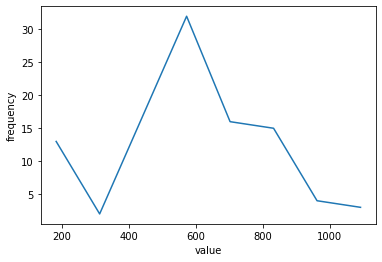

In [176]:
import matplotlib.pyplot as plt
plt.plot(mid_range,c)
plt.xlabel('value')
plt.ylabel('frequency')
print('Полигон по средним интервальным значениям и абсолютным частотам')

Гистограмма по средним интервальным значениям и абсолютным частотам


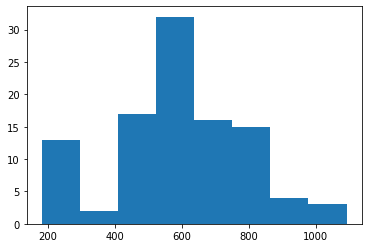

In [186]:
plt.hist(mid_range,weights=c,bins=k) 
print('Гистограмма по средним интервальным значениям и абсолютным частотам')

Эмпирическая функция по абсолютным частотам


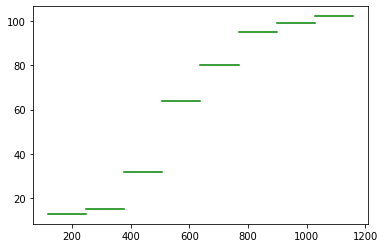

In [187]:
## накопленные абсолютные частоты 
m=[0]*(k)
for i in range(0,k):
    m[i]=(m[i-1]+c[i])
bin_dt, bin_gr = np.histogram(start, bins=len(c))
Y = m
for i in range(len(Y)):
    plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='green')
print('Эмпирическая функция по абсолютным частотам')

Полигон по средним интервальным значениям и относительным частотам


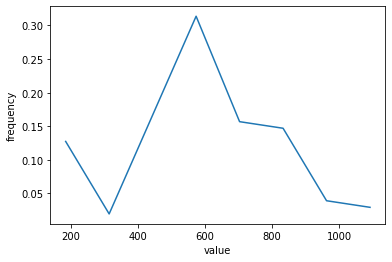

In [188]:
import matplotlib.pyplot as plt
plt.plot(mid_range,c1)
plt.xlabel('value')
plt.ylabel('frequency')
print('Полигон по средним интервальным значениям и относительным частотам')

Гистограмма по средним интервальным значениям и относительным частотам


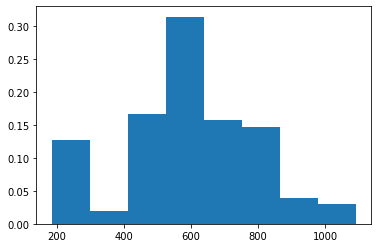

In [189]:
plt.hist(mid_range,weights=c1,bins=k) 
print('Гистограмма по средним интервальным значениям и относительным частотам')

Эмпирическая функция по относительным частотам


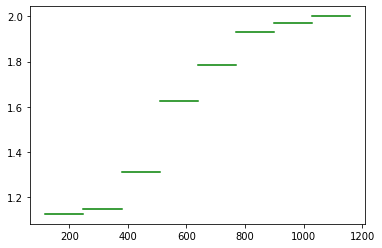

In [190]:
## накопленные отностельные частоты 
m1=[0]*(k)
for i in range(0,k):
    m[i]=(m[i-1]+c[i])
    m1[i]=m[i]/n   
bin_dt, bin_gr = np.histogram(start, bins=len(c))
Y = m1
for i in range(len(Y)):
    plt.plot([bin_gr[i], bin_gr[i+1]],[Y[i], Y[i]],color='green')
print('Эмпирическая функция по относительным частотам')

In [191]:
t = pd.DataFrame(columns=["(x(i-1);x(i)]","xср(i)","n(i)","p*(i)","sum(n(i))","sum(p*(i))]"])
t["(x(i-1);x(i)]"]=s1["int"]
t["xср(i)"]=mid_range
t["n(i)"]=s1["freq"]
t["p*(i)"]=c1
t["sum(n(i))"]=m
t["sum(p*(i))]"]=m1
t.loc["sum"]=["-","-",np.sum(t["n(i)"]),np.sum(t["p*(i)"]),"-","-"]
t

,(x(i-1);x(i)],xср(i),n(i),p*(i),sum(n(i)),sum(p*(i))]
0,"(117.63499999999999, 248.528]",183.601496,13,0.127451,115,1.127451
1,"(248.528, 378.381]",313.454489,2,0.019608,117,1.147059
2,"(378.381, 508.234]",443.307481,17,0.166667,134,1.313725
3,"(508.234, 638.087]",573.160474,32,0.313725,166,1.627451
4,"(638.087, 767.94]",703.013466,16,0.156863,182,1.784314
5,"(767.94, 897.793]",832.866459,15,0.147059,197,1.931373
6,"(897.793, 1027.646]",962.719451,4,0.039216,201,1.970588
7,"(1027.646, 1157.499]",1092.572444,3,0.029412,204,2.0
sum,-,-,102,1.000000,-,-


In [192]:
## номер ложного нуля
C=((len(c)-1)/2)
C=math.floor(C) if s1["freq"][math.floor(C)] > s1["freq"][math.ceil(C)] else math.ceil(C)
U =[]
t2 = pd.DataFrame(columns=["x(i)","n(i)","u(i)","n(i)u(i)","n(i)u^2(i)","n(i)u^3(i)","n(i)u^4(i)","n(i)(u(i)+1)^4"])
for i in range (len(c)):
    U.append((t["xср(i)"][i]-t["xср(i)"][C])/h)
n_u_1 = []
n_u_2 = []
n_u_3 = []
n_u_4 = []
n_u_plus = []
for i in range(len(U)):
    n_u_1.append(t["n(i)"][i]*U[i])
    n_u_2.append(t["n(i)"][i]*U[i]**2)
    n_u_3.append(t["n(i)"][i]*U[i]**3)
    n_u_4.append(t["n(i)"][i]*U[i]**4)
    n_u_plus.append(round(t["n(i)"][i]*(U[i]+1)**4,1))
t2["x(i)"]=t["xср(i)"][:len(t)-1]                     
t2["n(i)"]=t["n(i)"]    
t2["u(i)"]=U 
t2["n(i)u(i)"]=n_u_1 
t2["n(i)u^2(i)"]=n_u_2 
t2["n(i)u^3(i)"]=n_u_3  
t2["n(i)u^4(i)"]=n_u_4  
t2["n(i)(u(i)+1)^4"]=n_u_plus 
t2.loc["sum"]=["-",np.sum(t2["n(i)"]),"-",np.sum(t2["n(i)u(i)"]),np.sum(t2["n(i)u^2(i)"]),np.sum(t2["n(i)u^3(i)"]),np.sum(t2["n(i)u^4(i)"]),np.sum(t2["n(i)(u(i)+1)^4"])]
t2
 

,x(i),n(i),u(i),n(i)u(i),n(i)u^2(i),n(i)u^3(i),n(i)u^4(i),n(i)(u(i)+1)^4
0,183.601496,13,-3.0,-39.0,117.0,-351.0,1053.0,208.0
1,313.454489,2,-2.0,-4.0,8.0,-16.0,32.0,2.0
2,443.307481,17,-1.0,-17.0,17.0,-17.0,17.0,0.0
3,573.160474,32,0.0,0.0,0.0,0.0,0.0,32.0
4,703.013466,16,1.0,16.0,16.0,16.0,16.0,256.0
5,832.866459,15,2.0,30.0,60.0,120.0,240.0,1215.0
6,962.719451,4,3.0,12.0,36.0,108.0,324.0,1024.0
7,1092.572444,3,4.0,12.0,48.0,192.0,768.0,1875.0
sum,-,102,-,10.0,302.0,52.0,2450.0,4612.0


In [153]:
V = []
r = 4
for i in range(r):
    V.append(1/n*t2.loc["sum"][i+3])
V1= np.zeros(4)
V1[1]=(V[1]-V[0]**2)*h**2
V1[2]=(V[2]-3*V[1]*V[0]+2*V[0]**3)*h**3
V1[3]=(V[3]-4*V[2]*V[0]+6*V[1]*V[0]-3*V[0]**4)*h**4
t3=pd.DataFrame(columns=["v*(i)","и*(i)"], index=range(1,r+1))
t3["v*(i)"]=V
t3["и*(i)"]=V1
t3


,v*(i),и*(i)
1,0.098039,0.000000e+00
2,2.960784,4.976208e+04
3,0.509804,-7.863357e+05
4,24.019608,7.267524e+09


In [168]:

## среднее выборочное 
xB= np.sum(s)/n
## диспересия 
d=0
for i in range (n):
    d=d+(s[i]-xB)**2
d=d/n
print(xB)
## диспересия по условным 
D_=t3["и*(i)"][2]
## среднее выборочное  по условным 
xB_=h*t3["v*(i)"][1]+t["xср(i)"][C]
print(xB_)

591.2222868627451
585.8911592892158


591.2222868627451